# 🏠 Airbnb Open Data Analysis

## QUESTIONS

This project is aimed to uncover some insights from the **Airbnb Open Data**.  
The following questions will be answered from the dataset:

1. **What are the different property types in the Dataset?**  
2. **Which neighborhood group has the highest number of listings?**  
3. **Which neighborhoods group have the highest average prices for Airbnb listings?**  
4. **Is there a relationship between the construction year of property and price?**  
5. **Who are the top 10 hosts by calculated host listing count?**  
6. **Are hosts with verified identities more likely to receive positive reviews?**  
7. **Is there a correlation between the price of a listing and its service fee?**  
8. **What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?**  
9. **Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?**  

---

## 🧹 DATA WRANGLING

**Data wrangling**, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis.  
This includes several key steps such as:
- Handling missing values  
- Removing duplicates  
- Transforming data into a consistent format  

Effective data wrangling ensures that the dataset is **clean, reliable, and ready for exploration**, enabling meaningful insights to be derived from it.

---



#DATA WRANGLING

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_excel("1730285881-Airbnb_Open_Data.xlsx")

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [18]:
# Handle missing values and duplicates
df.drop_duplicates(inplace=True)
df.dropna(subset=["price", "neighbourhood group", "room type"], inplace=True)

# Fill missing numeric columns with median
numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical columns with mode
categorical_cols = df.select_dtypes(exclude="number").columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("✅ Data cleaned and ready for analysis.")

✅ Data cleaned and ready for analysis.


1.What are the different property types in the Dataset?

In [19]:
# Question 1
df["room type"].value_counts()

,count
room type,
Entire home/apt,53286
Private room,46182
Shared room,2200
Hotel room,115


2.Which neighborhood group has the highest number of listings?

neighbourhood group
Manhattan        43447
Brooklyn         41537
Queens           13164
Bronx             2687
Staten Island      946
brookln              1
manhatan             1
Name: count, dtype: int64


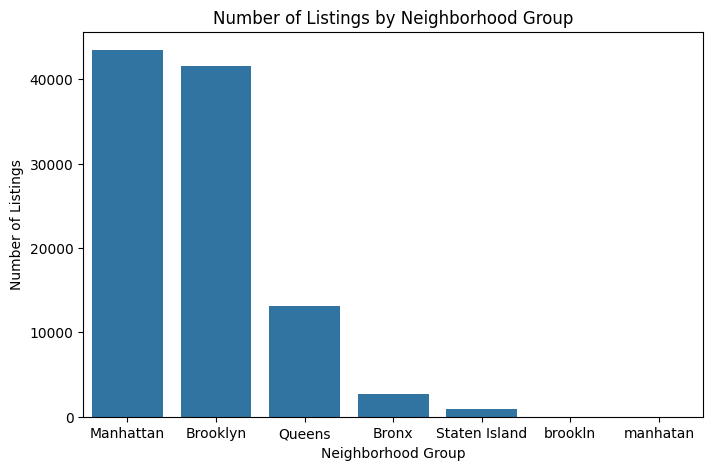

In [20]:
# Question 2
neighbourhood_count = df["neighbourhood group"].value_counts()
print(neighbourhood_count)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=neighbourhood_count.index, y=neighbourhood_count.values)
plt.title("Number of Listings by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Number of Listings")
plt.show()

3.Which neighborhood group has the highest average prices for Airbnb listings

neighbourhood group
Queens           630.217031
Bronx            627.764793
Brooklyn         626.501962
Staten Island    623.990486
Manhattan        622.650931
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


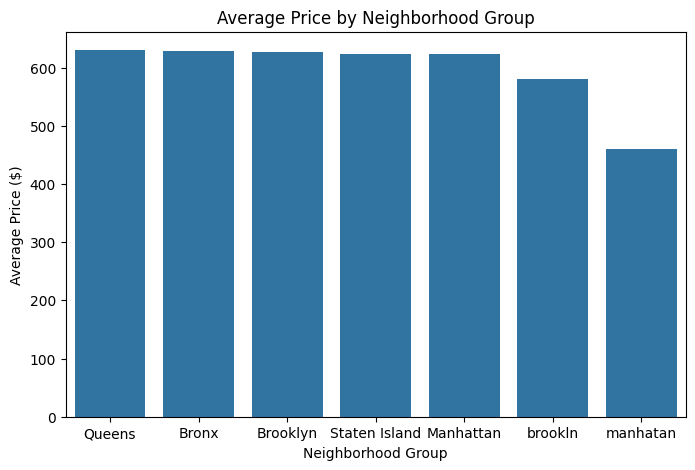

In [21]:
# Question 3
avg_price = df.groupby("neighbourhood group")["price"].mean().sort_values(ascending=False)
print(avg_price)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title("Average Price by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Average Price ($)")
plt.show()

4.Is there a relationship between the construction year of property and price?

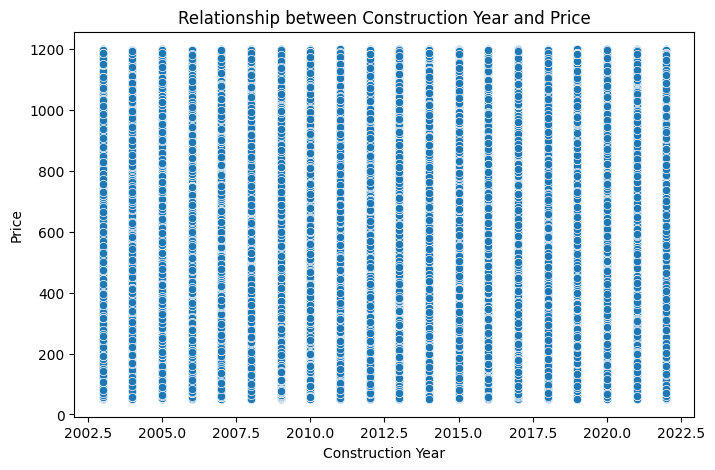

Correlation between Construction Year and Price: -0.0037764339033787143


In [22]:
# Question 4
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Construction year", y="price")
plt.title("Relationship between Construction Year and Price")
plt.xlabel("Construction Year")
plt.ylabel("Price")
plt.show()

correlation = df["Construction year"].corr(df["price"])
print("Correlation between Construction Year and Price:", correlation)


5.Who are the top 10 hosts by calculated host listing count?

In [23]:
# Question 5
top_hosts = df.groupby("host name")["calculated host listings count"].max().sort_values(ascending=False).head(10)
print(top_hosts)


host name
Blueground      332.0
Sonder (NYC)    327.0
Eugene          218.0
Karen           208.0
Jeniffer        186.0
Soya            171.0
Kaz             161.0
Hiroki          152.0
Momoyo          126.0
Shogo           125.0
Name: calculated host listings count, dtype: float64


6.Are hosts with verified identities more likely to receive positive reviews?

host_identity_verified
unconfirmed    3.270813
verified       3.285390
Name: review rate number, dtype: float64


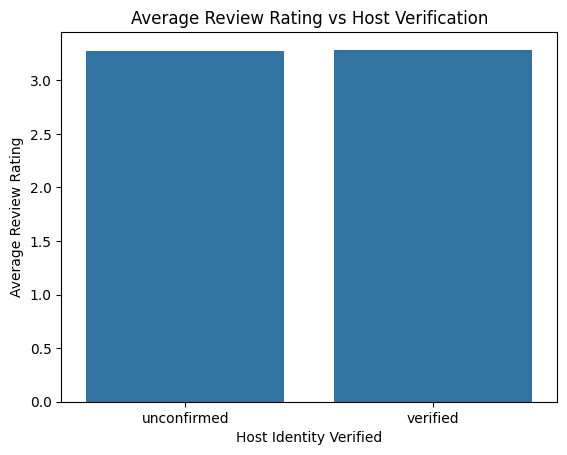

In [24]:
# Question 6
verified_reviews = df.groupby("host_identity_verified")["review rate number"].mean()
print(verified_reviews)

sns.barplot(x=verified_reviews.index, y=verified_reviews.values)
plt.title("Average Review Rating vs Host Verification")
plt.xlabel("Host Identity Verified")
plt.ylabel("Average Review Rating")
plt.show()



7.Is there a correlation between the price of a listing and its service fee?

Correlation between Price and Service Fee: 0.998752271258182


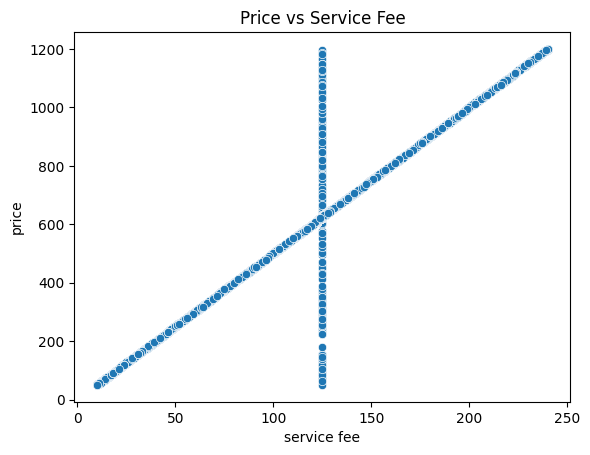

In [25]:
# Question 7
correlation_price_fee = df["price"].corr(df["service fee"])
print("Correlation between Price and Service Fee:", correlation_price_fee)

sns.scatterplot(data=df, x="service fee", y="price")
plt.title("Price vs Service Fee")
plt.show()


8.What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                       3.347099         NaN      3.322186     3.260870
Brooklyn                    3.249021    3.857143      3.263425     3.333333
Manhattan                   3.275144    3.500000      3.276612     3.257848
Queens                      3.350441    3.750000      3.314093     3.367688
Staten Island               3.329810         NaN      3.473799     3.533333
brookln                          NaN         NaN      4.000000          NaN
manhatan                         NaN         NaN      3.000000          NaN


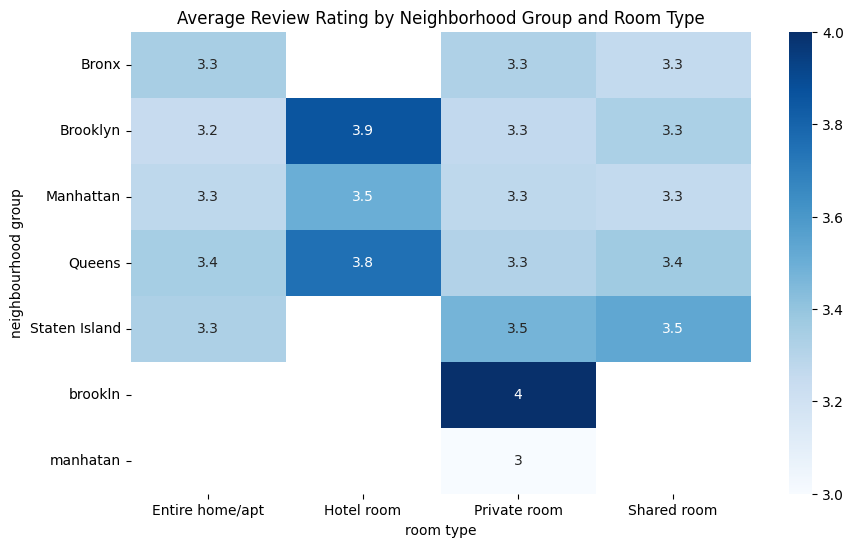

In [26]:
# Question 8
avg_review = df.groupby(["neighbourhood group", "room type"])["review rate number"].mean().unstack()
print(avg_review)

plt.figure(figsize=(10,6))
sns.heatmap(avg_review, annot=True, cmap="Blues")
plt.title("Average Review Rating by Neighborhood Group and Room Type")
plt.show()


9.Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

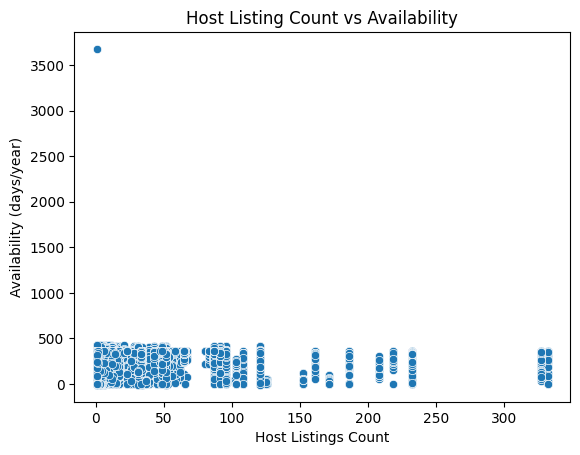

Correlation between Host Listing Count and Availability: 0.15901379102119184


In [27]:
# Question 9
sns.scatterplot(data=df, x="calculated host listings count", y="availability 365")
plt.title("Host Listing Count vs Availability")
plt.xlabel("Host Listings Count")
plt.ylabel("Availability (days/year)")
plt.show()

correlation_availability = df["calculated host listings count"].corr(df["availability 365"])
print("Correlation between Host Listing Count and Availability:", correlation_availability)
